# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
#pip install citipy # <-install to use citipy 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
# code was coming up empty bc date was not tracked correctly




# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + "Kentucky"
#print(url)

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #https://www.geeksforgeeks.org/python-string-replace/
    city_url =  url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
      # Convert the date to ISO standard.
    #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.fromtimestamp.html
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')  
                


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sompeta
Processing Record 2 of Set 1 | fomboni
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | lata
Processing Record 9 of Set 1 | oistins
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | lagunas
Processing Record 16 of Set 1 | praya
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | lingao
Processing Record 20 of Set 1 | olafsvik
Processing Record 21 of Set 1 | dhadar
Processing Record 22 of Set 1 | illoqqortoormiut
City n

Processing Record 39 of Set 4 | mount gambier
Processing Record 40 of Set 4 | costa rica
Processing Record 41 of Set 4 | farah
Processing Record 42 of Set 4 | faanui
Processing Record 43 of Set 4 | bermeo
Processing Record 44 of Set 4 | charters towers
Processing Record 45 of Set 4 | karasjok
Processing Record 46 of Set 4 | ardistan
City not found. Skipping...
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | healdsburg
Processing Record 49 of Set 4 | san patricio
Processing Record 0 of Set 5 | liverpool
Processing Record 1 of Set 5 | general pico
Processing Record 2 of Set 5 | hamilton
Processing Record 3 of Set 5 | lorengau
Processing Record 4 of Set 5 | rocha
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 5 | tasiilaq
Processing Record 8 of Set 5 | leghorn
City not found. Skipping...
Processing Record 9 of Set 5 | barcelos
Processing Record 10 of Set 5 | aira

Processing Record 23 of Set 8 | komsomolskiy
Processing Record 24 of Set 8 | yunjinghong
City not found. Skipping...
Processing Record 25 of Set 8 | amalapuram
Processing Record 26 of Set 8 | matagami
Processing Record 27 of Set 8 | sokoni
Processing Record 28 of Set 8 | pevek
Processing Record 29 of Set 8 | ngunguru
Processing Record 30 of Set 8 | yilan
Processing Record 31 of Set 8 | la rioja
Processing Record 32 of Set 8 | morondava
Processing Record 33 of Set 8 | caravelas
Processing Record 34 of Set 8 | prado
Processing Record 35 of Set 8 | sinnamary
Processing Record 36 of Set 8 | zhezkazgan
Processing Record 37 of Set 8 | tuatapere
Processing Record 38 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 39 of Set 8 | nanortalik
Processing Record 40 of Set 8 | marcona
City not found. Skipping...
Processing Record 41 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 42 of Set 8 | san luis
Processing Record 43 of Set 8 | gandai
Processing Record 44 of 

Processing Record 11 of Set 12 | havoysund
Processing Record 12 of Set 12 | unye
City not found. Skipping...
Processing Record 13 of Set 12 | krasnoborsk
Processing Record 14 of Set 12 | meadville
Processing Record 15 of Set 12 | uberaba
Processing Record 16 of Set 12 | bandipur
Processing Record 17 of Set 12 | sainte-maxime
Processing Record 18 of Set 12 | daru
Processing Record 19 of Set 12 | arroyo
Processing Record 20 of Set 12 | golspie
Processing Record 21 of Set 12 | naberera
Processing Record 22 of Set 12 | santa eulalia del rio
City not found. Skipping...
Processing Record 23 of Set 12 | neuquen
Processing Record 24 of Set 12 | medea
Processing Record 25 of Set 12 | college
Processing Record 26 of Set 12 | kushima
Processing Record 27 of Set 12 | sept-iles
Processing Record 28 of Set 12 | puerto ayacucho
Processing Record 29 of Set 12 | behshahr
Processing Record 30 of Set 12 | batagay-alyta
Processing Record 31 of Set 12 | jakarta
Processing Record 32 of Set 12 | beringovskiy

In [5]:
len(city_data)

583

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sompeta,18.9333,84.6000,72.00,58,100,6.20,IN,2023-02-01 01:21:13
1,fomboni,-12.2800,43.7425,82.15,73,100,7.99,KM,2023-02-01 01:21:15
2,butaritari,3.0707,172.7902,80.38,78,100,17.47,KI,2023-02-01 01:21:15
3,yellowknife,62.4560,-114.3525,-25.08,75,20,11.50,CA,2023-02-01 01:21:16
4,mar del plata,-38.0023,-57.5575,68.95,88,75,9.22,AR,2023-02-01 01:18:06


In [8]:
# Export the City_Data into a csv
#clean up to repo for FINAL CODE
city_data_df.to_csv("/Users/vickylynnmauldin/Desktop/personal-repo/submissions/python-api-challenge/Starter_Code/output_data2/weather_cites.csv", index_label="City_ID")

In [9]:
#clean up to repo for FINAL CODE
# Read saved data
city_data_df = pd.read_csv("/Users/vickylynnmauldin/Desktop/personal-repo/submissions/python-api-challenge/Starter_Code/output_data2/weather_cites.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sompeta,18.9333,84.6000,72.00,58,100,6.20,IN,2023-02-01 01:21:13
1,fomboni,-12.2800,43.7425,82.15,73,100,7.99,KM,2023-02-01 01:21:15
2,butaritari,3.0707,172.7902,80.38,78,100,17.47,KI,2023-02-01 01:21:15
3,yellowknife,62.4560,-114.3525,-25.08,75,20,11.50,CA,2023-02-01 01:21:16
4,mar del plata,-38.0023,-57.5575,68.95,88,75,9.22,AR,2023-02-01 01:18:06


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

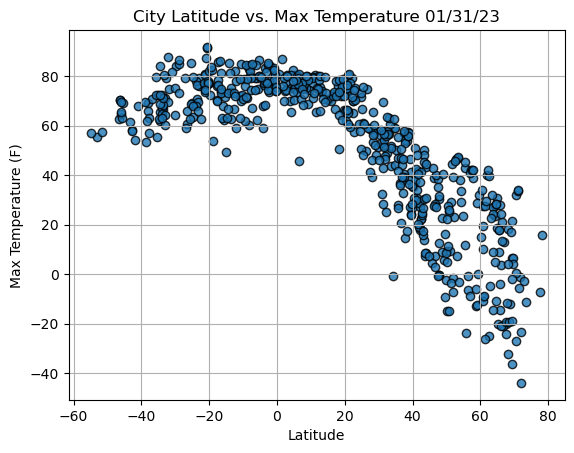

In [10]:
# Build scatter plot for latitude vs. temperature
x_axis =city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]

plt.scatter(x_axis,y_axis,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#UPDATES THIS FOR FINAL CODE
plt.savefig("/Users/vickylynnmauldin/Desktop/personal-repo/submissions/python-api-challenge/Starter_Code/output_data2/lat_vs_temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

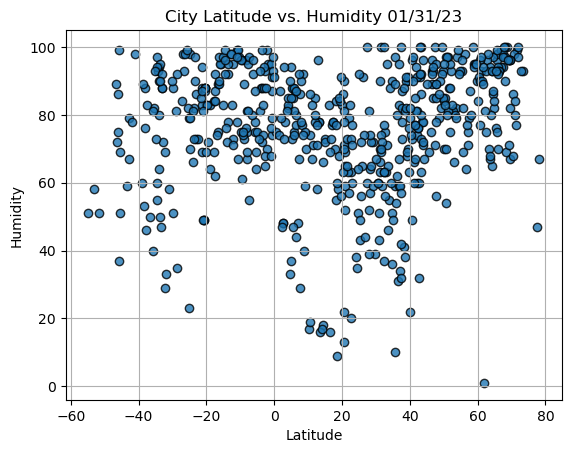

In [11]:
# Build the scatter plots for latitude vs. humidity
#tested it you can by pass making x & y a single varible and just put what points in df you want as x & y 
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/vickylynnmauldin/Desktop/personal-repo/submissions/python-api-challenge/Starter_Code/output_data2/lat_vs_hum.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

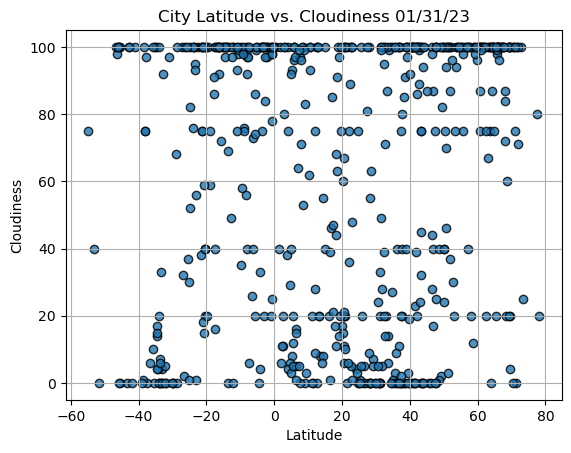

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("/Users/vickylynnmauldin/Desktop/personal-repo/submissions/python-api-challenge/Starter_Code/output_data2/lat_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

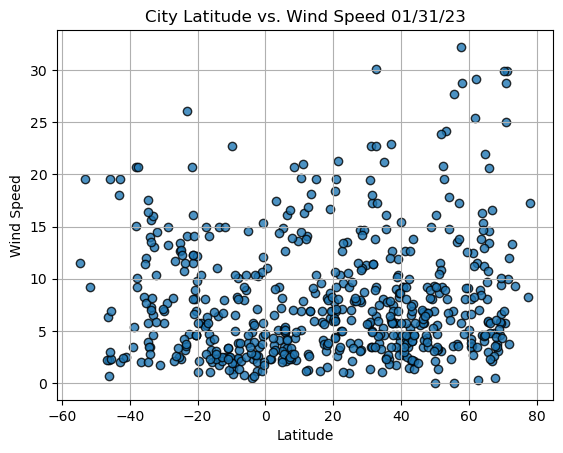

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("/Users/vickylynnmauldin/Desktop/personal-repo/submissions/python-api-challenge/Starter_Code/output_data2/lat_vs_wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
#

In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


# Display sample data
northern_hemi_df
#city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sompeta,18.9333,84.6000,72.00,58,100,6.20,IN,2023-02-01 01:21:13
2,butaritari,3.0707,172.7902,80.38,78,100,17.47,KI,2023-02-01 01:21:15
3,yellowknife,62.4560,-114.3525,-25.08,75,20,11.50,CA,2023-02-01 01:21:16
6,lata,40.1629,-8.3327,35.08,79,0,3.29,PT,2023-02-01 01:21:17
7,oistins,13.0667,-59.5333,73.49,78,20,6.91,BB,2023-02-01 01:16:56
...,...,...,...,...,...,...,...,...,...
574,san jose,37.3394,-121.8950,57.88,32,20,5.75,US,2023-02-01 01:22:21
575,semnan,35.5729,53.3971,41.70,89,100,2.30,IR,2023-02-01 01:25:00
576,methoni,36.8197,21.7049,39.06,67,0,6.46,GR,2023-02-01 01:25:00


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fomboni,-12.2800,43.7425,82.15,73,100,7.99,KM,2023-02-01 01:21:15
4,mar del plata,-38.0023,-57.5575,68.95,88,75,9.22,AR,2023-02-01 01:18:06
5,vaini,-21.2000,-175.2000,80.76,94,75,11.50,TO,2023-02-01 01:21:16
9,bredasdorp,-34.5322,20.0403,65.39,97,17,3.96,ZA,2023-02-01 01:21:18
10,saint-philippe,-21.3585,55.7679,74.79,88,100,12.24,RE,2023-02-01 01:21:19


###  Temperature vs. Latitude Linear Regression Plot

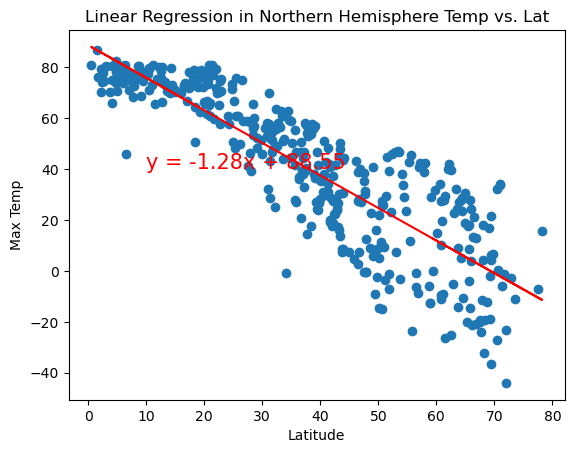

The r-value is :-0.8619934805607485


<Figure size 640x480 with 0 Axes>

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Northern Hemisphere Temp vs. Lat', 'Max Temp',(10,40))

#print the r values
corr = st.pearsonr(x_values, y_values)[0]
corr.astype(str)
print(f'The r-value is :{corr}')

plt.savefig("/Users/vickylynnmauldin/Desktop/personal-repo/submissions/python-api-challenge/Starter_Code/output_data2/lat_vs_temp_reg.png")

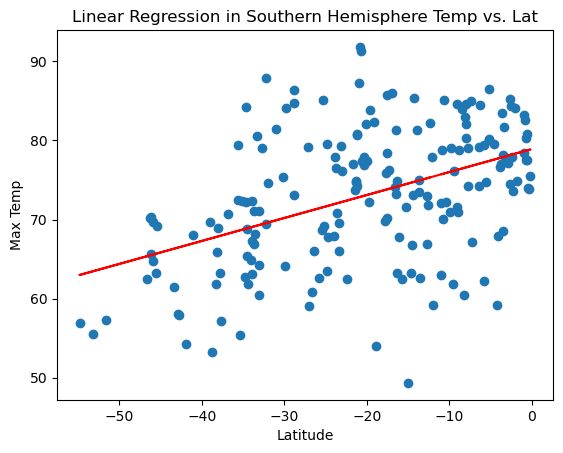

The r-value is :0.45691230211025685


<Figure size 640x480 with 0 Axes>

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Southern Hemisphere Temp vs. Lat', 'Max Temp',(10,40))
#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

plt.savefig("/Users/vickylynnmauldin/Desktop/personal-repo/submissions/python-api-challenge/Starter_Code/output_data2/lat_vs_temp_reg2.png")

**Discussion about the linear relationship:** Between the two data sets you see that the closer a hemisphere gets to the equator the higher the Max Temp becomes. In genral the furhter you are from the equator the colder it becomes however in general it appears that the southern hemishere, though seeing a decrese in tempature sitll remands significantly high max temps then the northern. 

### Humidity vs. Latitude Linear Regression Plot

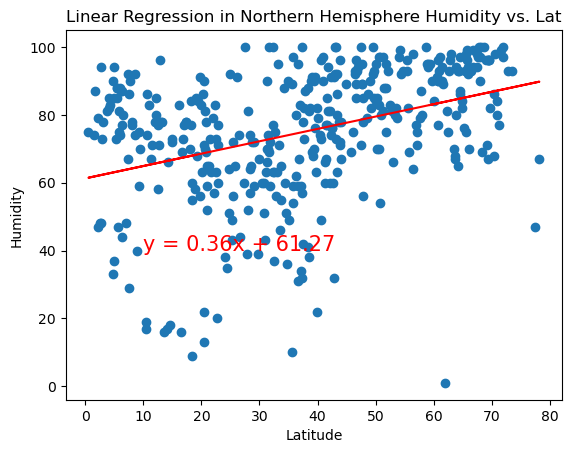

The r-value is :0.3750064460400969


In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Northern Hemisphere Humidity vs. Lat', 'Humidity',(10,40))

#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

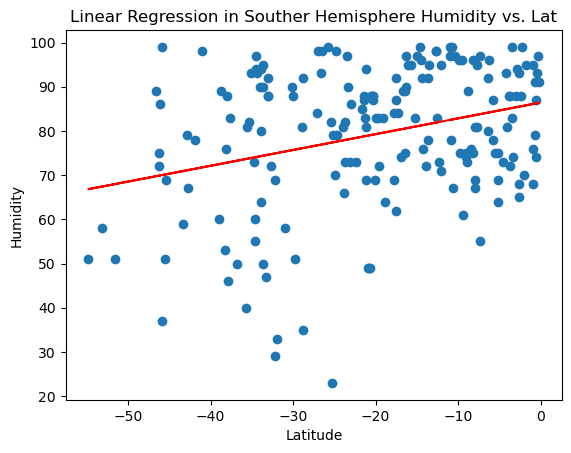

The r-value is :0.3028108308874664


In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Souther Hemisphere Humidity vs. Lat', 'Humidity',(10,40))

#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

**Discussion about the linear relationship:** there is a strong corraltion between the two data sets that show the higher the latitude the more likely the area is to experice higher humidity 

### Cloudiness vs. Latitude Linear Regression Plot

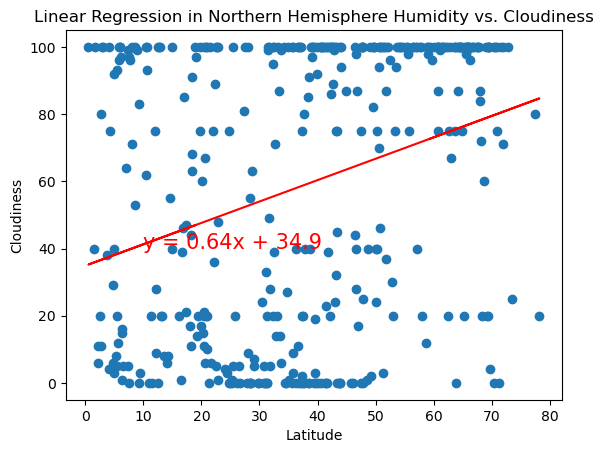

The r-value is :0.307912300592732


In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Northern Hemisphere Humidity vs. Cloudiness', 'Cloudiness',(10,40))

#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

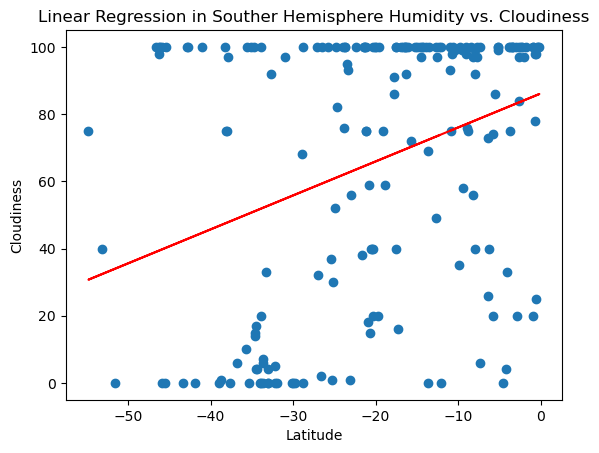

The r-value is :0.3410578414008069


In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Souther Hemisphere Humidity vs. Cloudiness', 'Cloudiness',(10,40))

#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

**Discussion about the linear relationship:** both data set you dont see a clear corration beteewn cloudiness and latitude location however it appears that the further south you are from the equator the less likely you are to experience cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

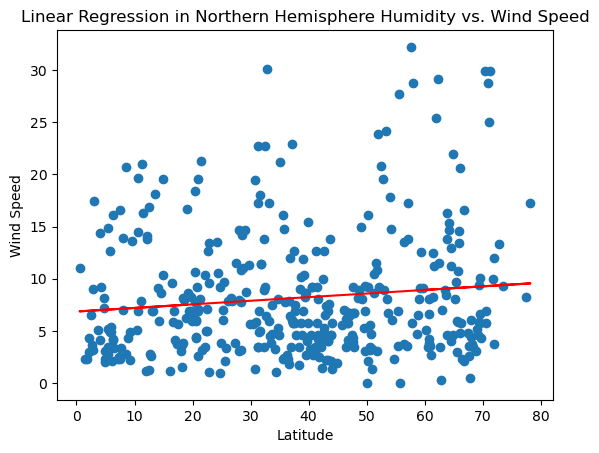

The r-value is :0.1161412005683922


In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Northern Hemisphere Humidity vs. Wind Speed', 'Wind Speed',(10,40))

#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

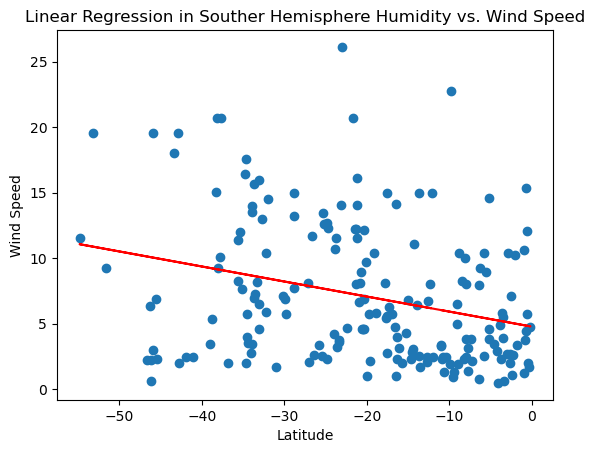

The r-value is :-0.29163860711425355


In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression in Souther Hemisphere Humidity vs. Wind Speed', 'Wind Speed',(10,40))

#print the r values
corr = st.pearsonr(x_values, y_values)[0]
print(f'The r-value is :{corr}')

**Discussion about the linear relationship:** In the souther hemisphere the further you are from the equator the higher the wind speed is. However in the norther hemisphere you see wind speed is consistant the further way from the equator you are with a gradule increase in wind speed. 